# Laboratorio 2: Exploración y Visualización de Datos
Fecha: Marzo 2025

Integrantes: **Tomás Vallejo Cerda / Juan Pablo Bustamante Flaño**

Sección 1

## Instrucciones

1.  Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda. Puede ocupar Jupyter notebook en su computador o usar Google Colab como alternativa online.

2.  Para cada pregunta **incluya el código fuente que utilizó para llegar a su respuesta. Respuestas sin código no recibirán puntaje.**.

3.  El formato de entrega para esta actividad es un archivo **html**. **Genere un archivo HTML usando Jupyter** y súbalo a U-Cursos. Basta con que un/a integrante haga la entrega. Si ambos/as hacen una entrega en U-Cursos, se revisará cualquiera de éstas.

## Accidentes de tránsito

Para esta sección utilizaremos un dataset real de número de accidentes de tránsito por localidad, el cual puede ser encontrado en el siguiente link: http://datos.gob.cl/dataset/9348. Para cargar el dataset ejecute el siguiente código:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tipos = pd.read_csv("https://users.dcc.uchile.cl/~hsarmien/mineria/datasets/accidentes_2010_2011.txt", sep=" ")
tipos.head()

,Muestra,Descripcion,Anio,TipoAccidente,Cantidad
1,Nacional,Nacional,2010,Atropello,8247
2,Nacional,Nacional,2011,Atropello,8339
3,Regional,XV Región Arica y Parinacota,2010,Atropello,115
4,Regional,XV Región Arica y Parinacota,2011,Atropello,159
5,Comunal,ARICA,2010,Atropello,115


Explore el set de datos para responder las siguientes preguntas:

1. ¿Cuáles son las dimensiones del dataset (filas, columnas)? (Recuerde adjuntar código).

In [3]:
filas, columnas = tipos.shape
print("Dimensiones del dataset (filas, columnas): ", filas, columnas)

Dimensiones del dataset (filas, columnas):  4296 5


2. ¿Qué describe cada línea del dataset? (ejemplifique tomando el dato de la fila 235, extienda la descripción)

Cada fila del dataset corresponde a un registro de accidentes, en el cual se especifica el nivel de la muestra (nacional, regional o comunal), la descripción geográfica asociada (lugar), el año de ocurrencia, el tipo de accidente y la cantidad de casos registrados.

In [4]:
print("Ejemplo:")
ej = tipos.loc[235]
print(ej)
print(
    f"En {ej['Descripcion']} (nivel {ej['Muestra']}), año {ej['Anio']}, "
    f"hubo {ej['Cantidad']} accidentes del tipo {ej['TipoAccidente']}."
)

Ejemplo:
Muestra            Comunal
Descripcion       PALMILLA
Anio                  2010
TipoAccidente    Atropello
Cantidad                 4
Name: 235, dtype: object
En PALMILLA (nivel Comunal), año 2010, hubo 4 accidentes del tipo Atropello.


3. ¿Cuántos años diferentes abarca la información del dataset? Entregue un array con los años.


In [5]:
años = tipos['Anio'].unique()
print(años)

[2010 2011]


4. Filtre los datos para incluir sólo los accidentes ocurridos el año 2011 a nivel Regional. Luego, genere un gráfico de barras que muestre la cantidad de accidentes en cada Región. Comente sus principales observaciones y si considera que es razonable usar el conteo de frecuencias para determinar las regiones más peligrosas en cuanto a accidentes de tránsito.

    **OJO**: hay que sumar la cantidad de accidentes para los distintos tipos de accidente de una misma región

Descripcion
I Región de Tarapacá                  1000
II Región de Antofagasta              2186
III Región de Atacama                  770
IV Región de Coquimbo                 2293
IX Región de la Araucanía             3985
Región Metropolitana                 23520
V Región de Valparaíso                7724
VI Región del Lib. Bdo. O´Higgins     3542
VII Región del Bio-Bio                6643
VII Región del Maule                  4390
X Región de Los Lagos                 2965
XI Región de Aysén                     598
XII Región de Magallanes              1020
XIV Región de Los Ríos                1180
XV Región Arica y Parinacota          1018
Name: Cantidad, dtype: int64

<Axes: xlabel='Descripcion'>

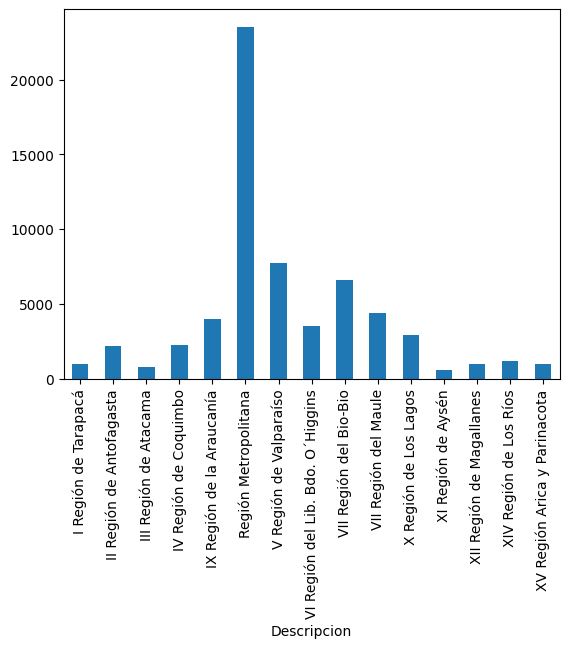

In [6]:
filtro = tipos[(tipos['Muestra'] == 'Regional') & (tipos['Anio'] == 2011)]
resultado = filtro.groupby(by = 'Descripcion')['Cantidad'].sum()
print(resultado)
resultado.plot(kind = "bar")

R: Es evidente que la Región Metropolitana concentra la mayor cantidad de accidentes y Aysén la menor. Sin embargo, esto no implica que una región sea más o menos peligrosa, ya que las diferencias pueden explicarse principalmente por el tamaño de su población y volumen de tránsito, ya que la RM es la región más poblada y la de Aysen la menos poblada del país.

5. Filtre los datos para incluir sólo los accidentes ocurridos el año 2010 a nivel regional. Genere un boxplot donde se indique la cantidad de accidentes categorizado por tipo de accidente. ¿Cuáles son sus principales observaciones?

               Cantidad
TipoAccidente          
Atropello          8247
Caida              1478
Choque            14558
Colision          29127
Otros               707
Volcadura          3629


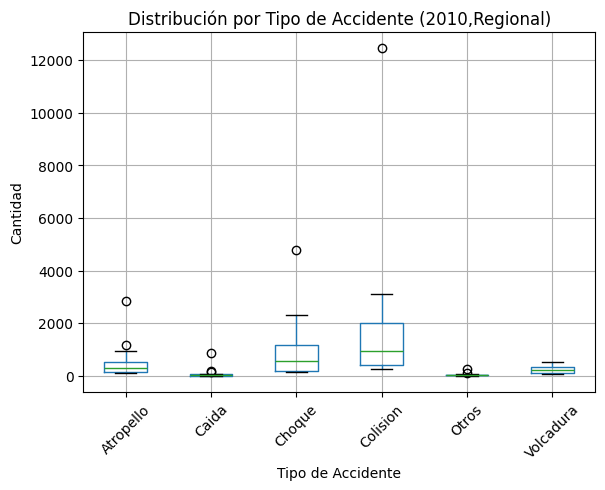

In [7]:
filtro = tipos[(tipos['Muestra'] == 'Regional') & (tipos['Anio'] == 2010)]
resultado = (filtro.groupby(['TipoAccidente']).agg({'Cantidad': 'sum'}))
print(resultado)
filtro.boxplot(column='Cantidad', by='TipoAccidente', rot=45)
plt.title('Distribución por Tipo de Accidente (2010,Regional)')
plt.ylabel('Cantidad')
plt.xlabel('Tipo de Accidente')
plt.suptitle('')
plt.show()

R: Como se puede ver ell boxplot muestra que Colisión y Choque concentran la mayor cantidad de accidentes (como calculamos antes) y presentan gran variabilidad entre regiones. Se observan outliers marcados en Colisión (sobre 12.000) y en Choque (más de 4.500), probablemente asociados a la Región Metropolitana por su densidad poblacional como se habló anteriormente. Atropello también presenta valores atípicos, aunque en menor magnitud. En contraste, Caída, Volcadura y Otros registran medianas bajas y distribuciones más homogéneas entre regiones.

In [8]:
# Buscar el registro con mayor cantidad en Colisión (verificarf el Outlier pensado)
outlier_colision = filtro[filtro['TipoAccidente'] == 'Colision'].sort_values('Cantidad', ascending=False).head(1)
outlier_colision


,Muestra,Descripcion,Anio,TipoAccidente,Cantidad
2043,Regional,Región Metropolitana,2010,Colision,12444


Efectivamente el Outlier era asociado a la RM como se pensaba

6. ¿Qué otra forma de explorar los datos podría agregar para el dataset de Accidentes de tránsito y qué información adicional aporta? Adjunte el código necesario.

1. Se podría explorar añadiendo un cálculo de la proporción de accidentes por región normalizando por el total en el país.

In [9]:
# Total nacional (suma de todos los accidentes)
total_nacional = filtro['Cantidad'].sum()

# Total de accidentes por región
acc_por_region = filtro.groupby('Descripcion')['Cantidad'].sum().reset_index()

# Calculo de proporción respecto al total nacional
acc_por_region['Proporcion (%)'] = (acc_por_region['Cantidad'] / total_nacional * 100).round(2)

# Ordenar de mayor a menor
acc_por_region = acc_por_region.sort_values('Proporcion (%)', ascending=False)

#Top5
acc_por_region.head()

,Descripcion,Cantidad,Proporcion (%)
5,Región Metropolitana,21675,37.54
6,V Región de Valparaíso,7023,12.16
9,VIII Región del Bio-Bio,6128,10.61
8,VII Región del Maule,4541,7.86
4,IX Región de la Araucanía,3514,6.09


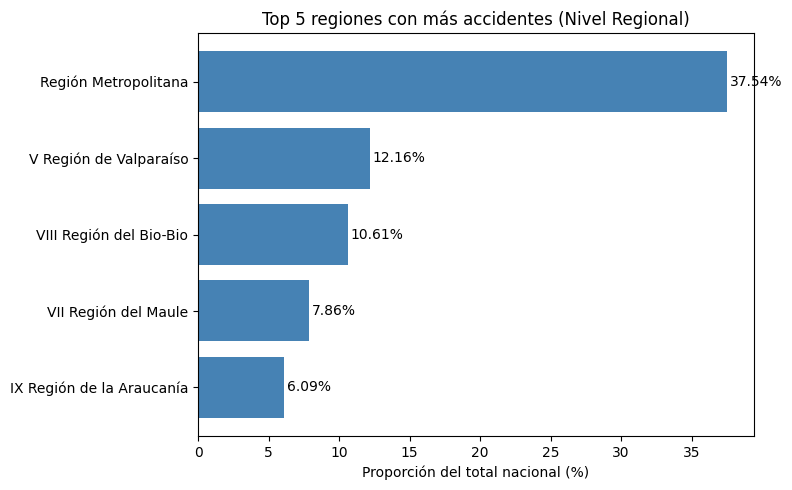

In [10]:
top5 = acc_por_region.head()
plt.figure(figsize=(8,5))
plt.barh(top5['Descripcion'], top5['Proporcion (%)'], color='steelblue')

plt.xlabel("Proporción del total nacional (%)")
plt.title("Top 5 regiones con más accidentes (Nivel Regional)")

# Invertir eje Y para que la región con mayor valor quede arriba
plt.gca().invert_yaxis()

# Mostrar valores en cada barra
for i, (region, pct) in enumerate(zip(top5['Descripcion'], top5['Proporcion (%)'])):
    plt.text(pct+0.2, i, f"{pct:.2f}%", va='center')

plt.tight_layout()
plt.show()

Con esto podemos ver la proporción de accidentes para cada región de una manera más visual, lo que permite identificar de forma clara qué regiones concentran una mayor proporción de accidentes a nivel nacional, facilitando la comparación entre ellas y destacando la fuerte concentración en la Región Metropolitana frente al resto del país.

2. También se podría explorar las diferencias en los accidentes entre 2010 y 2011 para ver si existen cambios

In [11]:
# Totales por año y tipo (solo nivel Regional)
tabla = (tipos[tipos['Muestra'] == 'Regional']
         .groupby(['TipoAccidente','Anio'])['Cantidad']
         .sum()
         .unstack(fill_value=0))   # convierte 'Anio' en columnas y rellena con 0

# Ordenar por total 2010+2011
tabla = tabla.loc[tabla.sum(axis=1).sort_values(ascending=False).index]

tabla


Anio,2010,2011
TipoAccidente,,
Colision,29127,31487
Choque,14558,16312
Atropello,8247,8339
Volcadura,3629,3985
Caida,1478,1488
Otros,707,1223


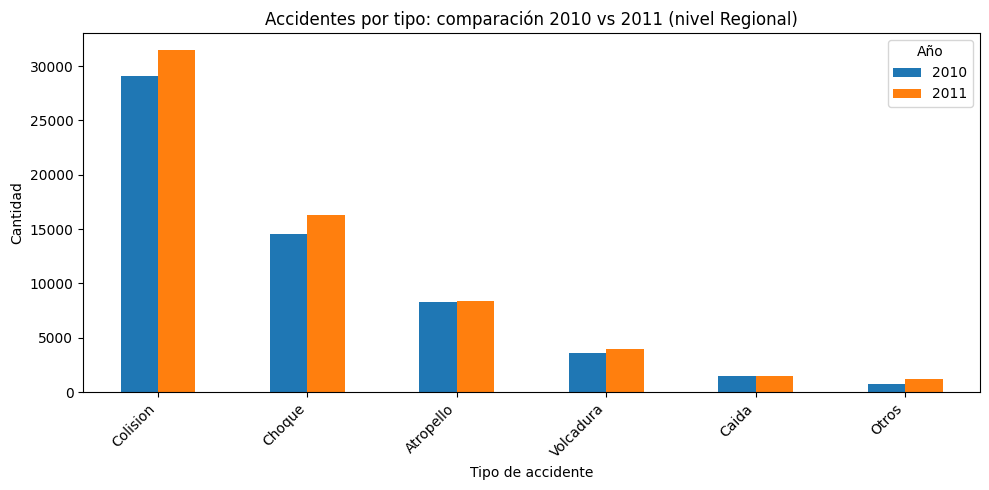

In [12]:
# Gráfico de barras agrupadas directo desde la tabla
tabla.plot(kind='bar', figsize=(10,5))

plt.title('Accidentes por tipo: comparación 2010 vs 2011 (nivel Regional)')
plt.ylabel('Cantidad')
plt.xlabel('Tipo de accidente')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Año')
plt.tight_layout()
plt.show()

En todos los tipos de accidentes se observa un aumento en 2011 respecto a 2010, lo que refleja un incremento general en la ocurrencia de siniestros vehiculares.

## Diabetes
Considere el set de datos de pacientes para la predicción de diabetes con las siguientes columnas:

- gender: género del paciente
- age: edad del paciente
- hypertension: indica si el paciente tiene o no hipertensión
- heart_disease: indica si el paciente tiene o no enfermedad cardiaca
- smoking_history: indica si el paciente es o fue fumador
- bmi: indice de masa corporal del paciente
- HbA1c_level: Hemoglobina HbA1c del paciente
- blood_glucose_level: Nivel de glucosa en sangre del paciente
- diabetes: si el paciente tiene o no diabetes

In [13]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/mzambrano1/Datasets-CC5205-otono-2023/master/lab1.2%202023-2/diabetes_prediction_dataset.csv")
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


7. Para explorar el dataset, realice un análisis de frecuencias de los atributos categóricos (categorías binarias y multiclase).



Se seleccionan las columnas categóricas y le calculamos sus frecuencias aboslutas y relativas para entender de mejor manera el Dataset

In [14]:
# Seleccionar solo columnas categóricas
cats = ['gender','hypertension','heart_disease','smoking_history','diabetes']

# Tablas de frecuencia
for col in cats:
    print(f"\nFrecuencia de {col}:")
    freqs = diabetes[col].value_counts()
    #Frecuencias relativas
    rel_freqs = diabetes[col].value_counts(normalize=True).round(3)*100
    tabla = pd.DataFrame({'Frecuencia': freqs, 'Frecuencia relativa (%)': rel_freqs})
    print(tabla)



Frecuencia de gender:
        Frecuencia  Frecuencia relativa (%)
gender                                     
Female       58552                     58.6
Male         41430                     41.4
Other           18                      0.0

Frecuencia de hypertension:
              Frecuencia  Frecuencia relativa (%)
hypertension                                     
0                  92515                     92.5
1                   7485                      7.5

Frecuencia de heart_disease:
               Frecuencia  Frecuencia relativa (%)
heart_disease                                     
0                   96058                     96.1
1                    3942                      3.9

Frecuencia de smoking_history:
                 Frecuencia  Frecuencia relativa (%)
smoking_history                                     
No Info               35816                     35.8
never                 35095                     35.1
former                 9352                      9

8. Muestre estadísticas de resumen para las variables numéricas y comenten sus observaciones.

In [15]:
# Columnas numéricas del dataset
nums = ['age','bmi','HbA1c_level','blood_glucose_level']
resumen = diabetes[nums].describe(include = 'all')
print(resumen)

                 age            bmi    HbA1c_level  blood_glucose_level
count  100000.000000  100000.000000  100000.000000        100000.000000
mean       41.885856      27.320767       5.527507           138.058060
std        22.516840       6.636783       1.070672            40.708136
min         0.080000      10.010000       3.500000            80.000000
25%        24.000000      23.630000       4.800000           100.000000
50%        43.000000      27.320000       5.800000           140.000000
75%        60.000000      29.580000       6.200000           159.000000
max        80.000000      95.690000       9.000000           300.000000


En aspecto generales vemos que la edad promedio es de 42 años. El IMC medio es de 27 lo que se consider un rango de sobrepeso, con un máximo muy alto que sugiere outliers. Los niveles de HbA1c y glucosa muestran medias dentro de rangos normales (según lo estudiado), aunque existen valores extremos (outliers) que podrían reflejar posibles casos de descontrol metabólico.

# Clasificación

Ahora crearemos un clasificador binario (por ahora no importa cómo funciona), y veremos que tal es su desempeño decidiendo si una persona tiene diabetes o no.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Droppear categoricas
df_clf = diabetes.drop(columns=['gender', 'smoking_history'])
# Separar atributos y target
X = df_clf.drop(columns=['diabetes'])
y = df_clf['diabetes']
# Separar conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Entrenar modelo
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
# Obtener predicciones
y_pred = clf.predict(X_test)

### Veamos su matríz de confusión

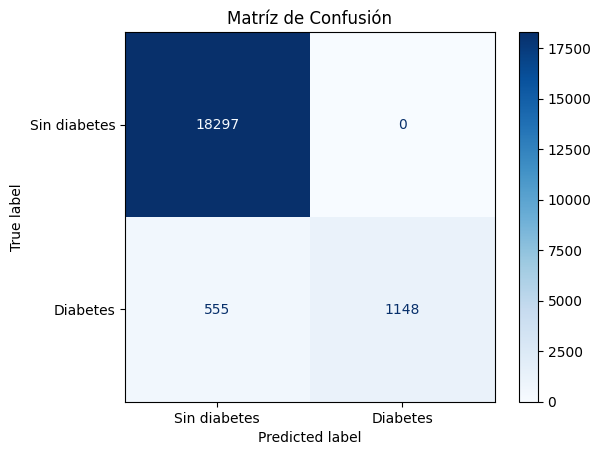

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sin diabetes', 'Diabetes'])
disp.plot(cmap='Blues')
plt.title('Matríz de Confusión')
plt.show()

9. ¿Qué opina la visualización de la matriz de confusión? ¿Existe algún problema asociado al desbalance de clases? Corrija la visualización según sus observaciones.

Puede ser útil ver la documentación de [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

R:  Existe un desbalance de clases, lo que hace que la matriz de confusión en valores absolutos muestre un rendimiento engañoso. La recomendación para mejorar la visualización en estos caso sería normalizar con lo que se aprecia de mejor manera el desempeño real del modelo, destacando la necesidad de mejorar la sensibilidad en la clase minoritaria. Hagamos eso:

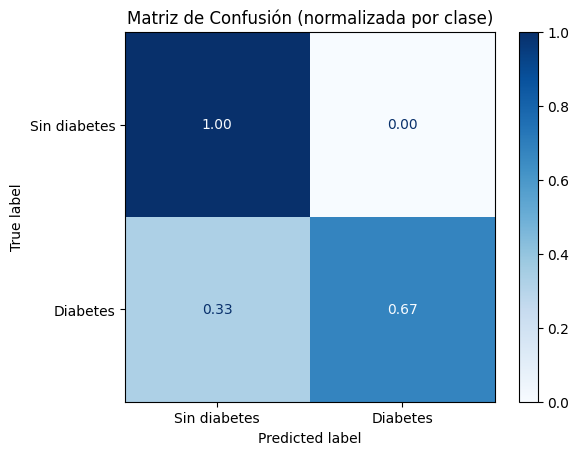

In [18]:
# Matriz de confusión normalizada (proporción por clase real)
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm,
                              display_labels=['Sin diabetes', 'Diabetes'])
disp.plot(cmap='Blues', values_format=".2f")
plt.title('Matriz de Confusión (normalizada por clase)')
plt.show()


Como se puede ver al normalizar la matriz de confusión mejora la interpretabilidad, ya que se observa claramente que el modelo acierta en el 100% de los no diabéticos pero solo en el 67% de los diabéticos, evidenciando de manera más transparente el impacto del desbalance de clases.

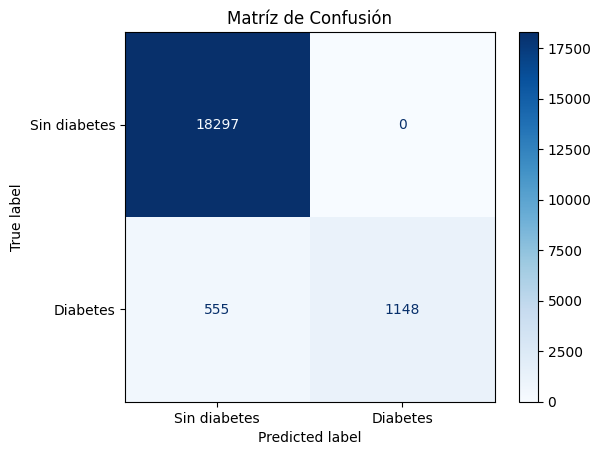

In [19]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sin diabetes', 'Diabetes'])
disp.plot(cmap='Blues')
plt.title('Matríz de Confusión')
plt.show()

10. ¿Qué se puede decir a partir de la matriz de confusión? ¿El clasificador tiene un problema asociado a precision o recall?

R: La matriz de confusión evidencia que el modelo clasifica bien a los no diabéticos (TN), pero falla al identificar una proporción importante de personas con diabetes (FN). Esto se debe al desbalance de clases (es de esperar que hayan menos gente diabética que no diabética lo que genera un desbalance) y puede ser crítico en un contexto médico, ya que como vimos en clase esto implica dejar sin diagnóstico a pacientes enfermos. Con esto la precisión no es el principal inconveniente, ya que casi no hay falsos positivos, pero el bajo recall (castiga por FN) en diabéticos es crítico en un contexto médico al dejar sin diagnóstico a pacientes enfermos.

### Curva ROC 🤘

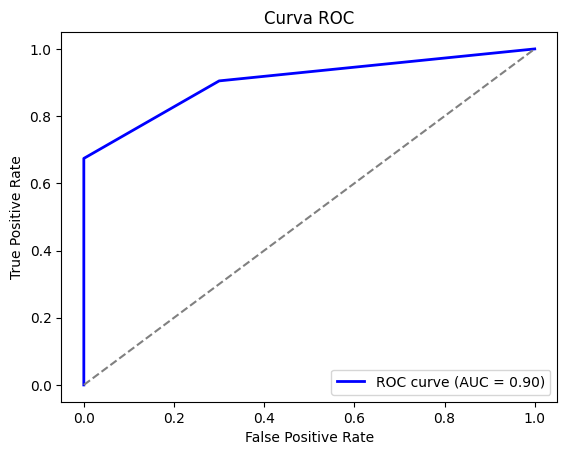

In [20]:
from sklearn.metrics import roc_curve, auc

y_scores = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Identidad
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

11. ¿Podemos decir que el modelo es bueno según su curva ROC? ¿Para que podemos usar esta visualización?

R: La curva ROC muestra un AUC de 0.90, lo que apriori sugiere buen poder discriminativo. Sin embargo, al enfocarse solo en TP y FP no refleja el impacto de los falsos negativos, que en un contexto médico son críticos y es justo lo que falla en este caso. Por loque exclusivamente mediante la curva ROC no poodemos asegurar de que sea un buen modelo, se debe complementar con otras métricas comno el recall, o usar una curva del tipo Precision - Recall, veámosla:

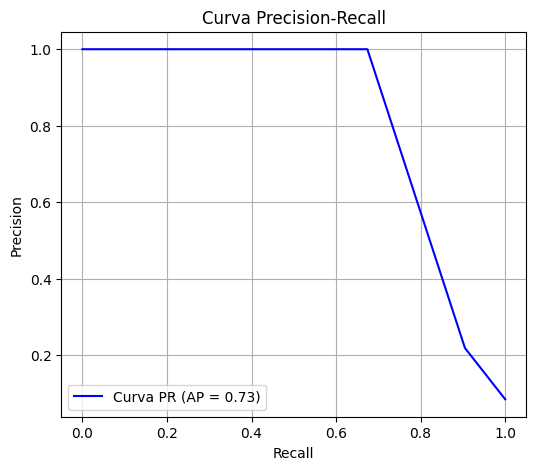

In [21]:
#extra
from sklearn.metrics import precision_recall_curve, average_precision_score

# Obtener probabilidades de la clase positiva
y_scores = clf.predict_proba(X_test)[:, 1]

# Calcular precision y recall para distintos umbrales
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calcular promedio del área bajo la curva
ap = average_precision_score(y_test, y_scores)

# Graficar
plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='blue', label=f'Curva PR (AP = {ap:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.grid(True)
plt.show()


La curva PR (AP = 0.73) indica buena precisión con bajo recall, pero al aumentar la cobertura de casos positivos la precisión cae rápidamente, reflejando el impacto del desbalance de clases que mencionamos anteriormente.

12. ¿Sería seguro usar este clasificador en un caso real diagnosicando pacientes?

R: Definitivamente no sería seguro usar este clasificador en un contexto real de diagnóstico, ya que aunque como se vió muestra un buen AUC en la curva ROC, su bajo recall implica que muchos pacientes enfermos quedarían sin detectar. En medicina, los falsos negativos son críticos. El modelo debe ajustarse para cualquier naplicación real a futuro.

Y eso es todo por hoy :)
